In [1]:
import numpy as np
import note_seq
import bokeh
import librosa.display
import librosa
import matplotlib.pyplot as plt

from src.data.make_dataset import WavMidiDataset
from src.entities.audio_params import AudioParams
from src.entities.dataset_params import DatasetParams
from src.features.build_features import detokenize

/home/ilya20/docomets/MusicTranscription/.venv/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/home/ilya20/docomets/MusicTranscription/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
audio_params = AudioParams(
    sample_rate=44100,
    frame_length=4096,
    n_mels=512,
    fmin=8,
    fmax=12500,
    window="hann"
)
dataset_params = DatasetParams(
    root_path="../data/raw/maestro-v3.0.0/",
    metadata="maestro-v3.0.0.csv",
    years_list=[2014],
    split="train",
    audio_params=audio_params,
    feature_size=3,
    overlapping=8,
)

dataset = WavMidiDataset(dataset_params)

In [3]:
frames, notes, times = dataset[0]
midi_filename, _ = dataset._data.iloc[0]
ns = note_seq.midi_file_to_note_sequence(dataset._root_path + midi_filename)

In [4]:
frames.shape

(14008, 512, 3)

In [5]:
len(notes), len(times)

(14008, 14008)

In [40]:
times[46]

1.6021768707482993

In [27]:
detokenized = detokenize(notes, times, dataset._frame_time)

fig = note_seq.plot_sequence(ns, False)
fig_proc = note_seq.plot_sequence(detokenized, False)

fig.height = 200
fig_proc.height = 200
fig.width = 1500
fig_proc.width = 1500

bokeh.plotting.output_notebook()
bokeh.plotting.show(fig)
bokeh.plotting.show(fig_proc)

Loading BokehJS ...

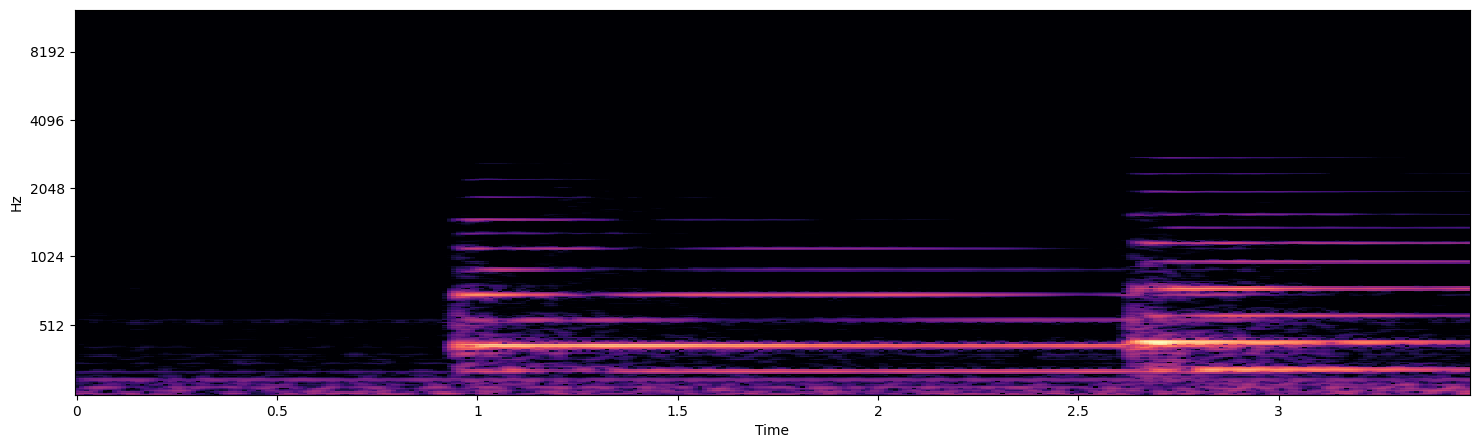

In [42]:

plt.figure(figsize=(18, 5))
librosa.display.specshow(
    np.hstack(frames[:100]),
    sr=audio_params.sample_rate,
    x_axis='time',
    y_axis='mel',
    fmax=12500,
    fmin=8,
    hop_length=dataset._hop_length
)

In [6]:
from itertools import cycle


arr = np.arange(5)
counter = 0

for i, item in enumerate(zip(np.arange(10), cycle(arr))):
    if counter > 10:
        break
    print(i, item)
    counter += 1

ValueError: not enough values to unpack (expected 3, got 2)